In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install scalecast

In [ ]:
from scalecast.Forecaster import Forecaster
from scalecast.MVForecaster import MVForecaster
from scalecast import GridGenerator
from scalecast.notebook import tune_test_forecast

In [ ]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
from scalecast.Forecaster import Forecaster

raw_data = pd.read_csv('/content/drive/MyDrive/Projecto Marvik/Datos/TWTR.csv')
raw_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/2/2018,24.070000,24.570000,23.850000,24.510000,24.510000,15297200
1,1/3/2018,24.559999,24.680000,24.070000,24.450001,24.450001,12832600
2,1/4/2018,24.500000,24.590000,23.690001,23.990000,23.990000,17653500
3,1/5/2018,24.070000,24.570000,23.879999,24.320000,24.320000,14953200
4,1/8/2018,24.370001,24.780001,23.879999,24.590000,24.590000,17831300


In [ ]:
raw_data = pd.DataFrame(raw_data.loc[:,['Date','Close']])

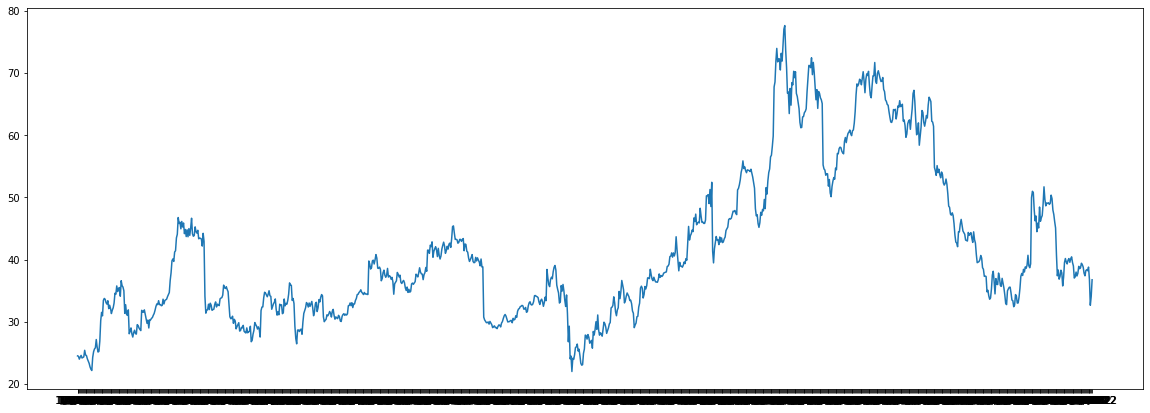

In [ ]:
plt.figure(figsize=(20,7))
plt.plot(raw_data['Date'],raw_data['Close'])
plt.show()

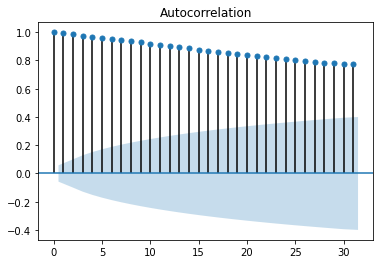

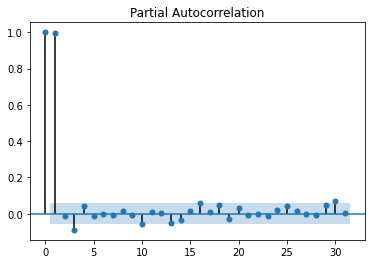

In [ ]:
f = Forecaster(y=raw_data['Close'], current_dates=raw_data['Date'])

f.plot_acf()
f.plot_pacf()
plt.show()

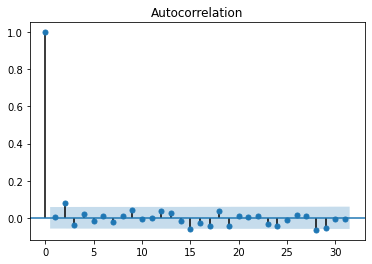

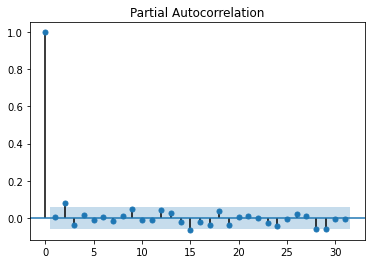

In [ ]:
f.plot_acf(diffy=True)
f.plot_pacf(diffy=True)
plt.show()

In [ ]:
# genera un Grids.py con todos los modelos tuneables y los parametros a probar

from scalecast import GridGenerator
GridGenerator.get_example_grids() 

In [ ]:
models = ('elasticnet','gbt','knn','lasso','mlp','mlr','ridge','sgd','xgboost')
f.set_test_length(100)
f.set_validation_length(20)
f.generate_future_dates(10)
f.add_time_trend()
f.add_ar_terms(3) # lag = 3
f.tune_test_forecast(models,feature_importance=True,summary_stats=True)

lasso TestSetRMSE: 5.113928315230168
lasso HyperParams: {'alpha': 0.06}
elasticnet TestSetRMSE: 5.385955040118405
elasticnet HyperParams: {'alpha': 0.1, 'l1_ratio': 1}
mlp TestSetRMSE: 5.8497336978761885
mlp HyperParams: {'activation': 'tanh', 'hidden_layer_sizes': (25,), 'solver': 'lbfgs'}
ridge TestSetRMSE: 5.890213626463162
ridge HyperParams: {'alpha': 0.18}
mlr TestSetRMSE: 6.04663795727217
mlr HyperParams: {}


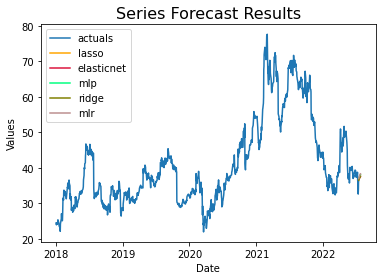

In [ ]:
#la funcion plot permite seleccionar los mejores 5 modelos y mostrar sus atributos

f.plot(models='top_5',order_by='TestSetRMSE',print_attr=['TestSetRMSE','HyperParams','models'])
plt.title('Series Forecast Results',size=16)
plt.show()

In [ ]:
# la funcion export genera una predicción en base a generate_future_dates y el modelo elegido

f.export_forecasts_with_cis('lasso')

,DATE,UpperForecast,Forecast,LowerForecast,ModelNickname,CILevel
0,2022-07-14,39.727835,36.894692,34.061549,lasso,0.95
1,2022-07-15,39.868211,37.035068,34.201925,lasso,0.95
2,2022-07-16,40.004399,37.171256,34.338113,lasso,0.95
3,2022-07-17,40.136524,37.303381,34.470238,lasso,0.95
4,2022-07-18,40.264708,37.431565,34.598422,lasso,0.95
5,2022-07-19,40.389069,37.555926,34.722783,lasso,0.95
6,2022-07-20,40.509719,37.676576,34.843433,lasso,0.95
7,2022-07-21,40.626770,37.793627,34.960484,lasso,0.95
8,2022-07-22,40.740330,37.907187,35.074044,lasso,0.95
9,2022-07-23,40.850502,38.017359,35.184216,lasso,0.95


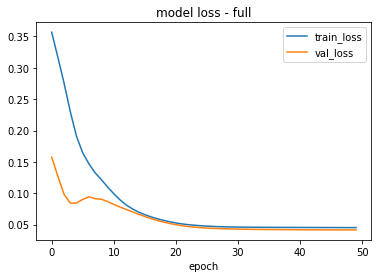

lstm TestSetRMSE: 2.328812541554001


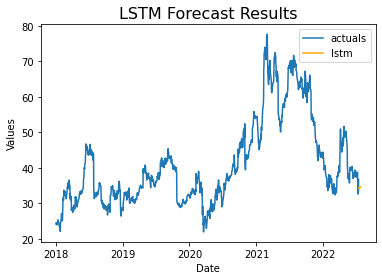

In [ ]:
# Otro ejemplo usando LSTM

GridGenerator.get_example_grids()
f = Forecaster(y=raw_data['Close'], current_dates=raw_data['Date'])
f.generate_future_dates(10) # forecast con un largo de 10
f.add_ar_terms(3) # lag = 3
f.add_time_trend()
f.set_estimator('lstm')
f.manual_forecast(call_me='lstm',
                  lags=3,
                  epochs=50,
                  validation_split=.1,
                  shuffle=False,
                  activation='relu',
                  optimizer='Adam',
                  plot_loss=True,
                  verbose=False)

f.plot(models='lstm',print_attr=['TrainSetRMSE','TestSetRMSE'])
plt.title('LSTM Forecast Results',size=16)
plt.show()

In [ ]:
f.export_forecasts_with_cis('lstm')

,DATE,UpperForecast,Forecast,LowerForecast,ModelNickname,CILevel
0,2022-07-14,38.318787,34.149450,29.980112,lstm,0.95
1,2022-07-15,38.346785,34.177448,30.008110,lstm,0.95
2,2022-07-16,38.539576,34.370238,30.200901,lstm,0.95
3,2022-07-17,38.352609,34.183272,30.013934,lstm,0.95
4,2022-07-18,38.439566,34.270229,30.100891,lstm,0.95
5,2022-07-19,38.530925,34.361587,30.192250,lstm,0.95
6,2022-07-20,38.687338,34.518001,30.348663,lstm,0.95
7,2022-07-21,38.603581,34.434243,30.264906,lstm,0.95
8,2022-07-22,38.797944,34.628607,30.459269,lstm,0.95
9,2022-07-23,38.835375,34.666037,30.496700,lstm,0.95
